In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
image_size =128
batch_size = 32
num_classes=4

In [4]:
dataset_test=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset of project/Combined Dataset/test",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size,
    color_mode="grayscale"
)

dataset_train=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset of project/Combined Dataset/train",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 1279 files belonging to 4 classes.
Found 10330 files belonging to 4 classes.


In [5]:
class_names_test=dataset_test.class_names
class_names_train=dataset_train.class_names
print("test columns is "+str(class_names_test))
print("train columns is "+str(class_names_train))

test columns is ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
train columns is ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']


In [6]:
train_size = int(0.8 * dataset_train.cardinality().numpy())
val_size = int(0.2 * dataset_train.cardinality().numpy())

dataset_train_full = dataset_train.shuffle(buffer_size=1000)
dataset_train = dataset_train_full.take(train_size)
dataset_val = dataset_train_full.skip(train_size)

In [7]:
print("Train size:", dataset_train.cardinality().numpy())
print("Validation size:", dataset_val.cardinality().numpy())
print("Test size:", dataset_test.cardinality().numpy())

Train size: 258
Validation size: 65
Test size: 40


In [8]:
normalization_layer = layers.Rescaling(1.0 / 255)
dataset_train = dataset_train.map(lambda x, y: (normalization_layer(x), y))
dataset_val = dataset_val.map(lambda x, y: (normalization_layer(x), y))
dataset_test = dataset_test.map(lambda x, y: (normalization_layer(x), y))

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
dataset_train = dataset_train.prefetch(buffer_size=AUTOTUNE)
dataset_val = dataset_val.prefetch(buffer_size=AUTOTUNE)
dataset_test = dataset_test.prefetch(buffer_size=AUTOTUNE)

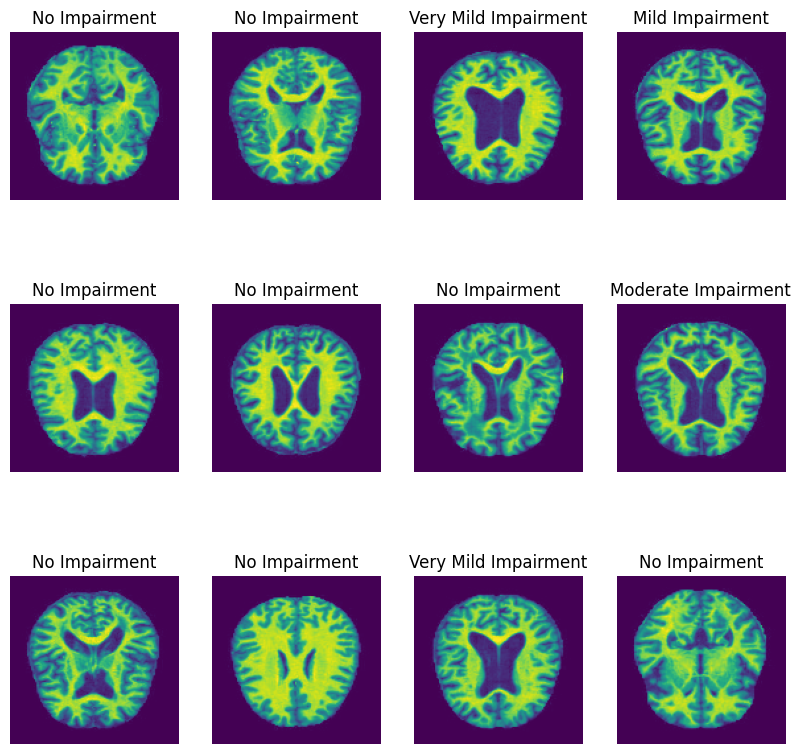

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_test.take(1):
 for i in range(12):
  ax=plt.subplot(3,4,i+1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names_test[label_batch[i]])
  plt.axis("off")

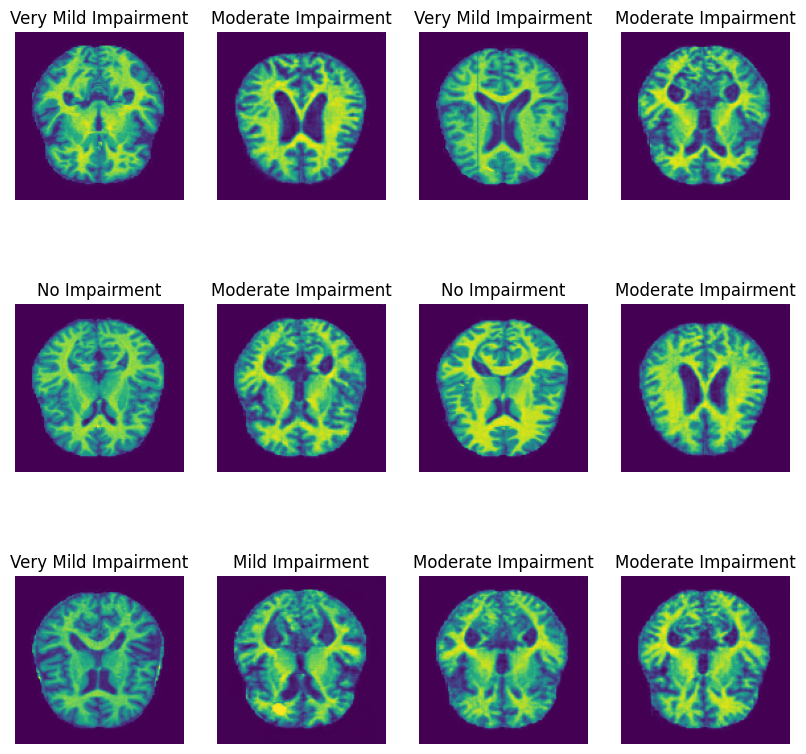

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_train.take(1):
 for i in range(12):
  ax=plt.subplot(3,4,i+1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names_train[label_batch[i]])
  plt.axis("off")

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Assuming categorical classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,724 (3.17 MB)

 Trainable params: 830,724 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    dataset_train,
    validation_data=dataset_val,
    batch_size=batch_size,
    epochs=10
)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.9284 - loss: 0.1756 - val_accuracy: 0.9858 - val_loss: 0.0504
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 47s 190ms/step - accuracy: 0.9323 - loss: 0.1606 - val_accuracy: 0.9697 - val_loss: 0.0756
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 331ms/step - accuracy: 0.9343 - loss: 0.1628 - val_accuracy: 0.9706 - val_loss: 0.0762
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 63s 330ms/step - accuracy: 0.9269 - loss: 0.1599 - val_accuracy: 0.9924 - val_loss: 0.0278
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 331ms/step - accuracy: 0.9185 - loss: 0.1731 - val_accuracy: 0.9811 - val_loss: 0.0433
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 63s 330ms/step - accuracy: 0.9278 - loss: 0.1653 - val_accuracy: 0.9867 - val_loss: 0.0333
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 63s 330ms/step - accuracy: 0.9394 - loss: 0.1427 - val_accuracy: 0.9943 - val_loss: 0.0233
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 62s 179ms/step - accuracy: 0.9426 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(dataset_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9115 - loss: 0.2356
Test accuracy: 90.77%


In [ ]:
model.save('/content/drive/MyDrive/AI/model.keras') # Changed the extension to '.keras'